### REGULARIZATION

### . A MODEL WITH LOW ACCURACY IF IT IS OVERFITTING
### . OVERFITTING OCCURS WHEN MODEL TRY TO CAPTURES THE TRAIN DATA 
### . WHEN MODEL IS MORE FLEXIBLE IT IS OVERFITTING

### . REGULARIZATION STRENGTH IS PROVIDED BY PARAMETER ALPHA

### . LASSO AND RIDGE ARE TWO OPTIONS

In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
X_train = pd.DataFrame({'sqft':[1000,2000,3500,2455,1800,1550]})
y_train = pd.Series([40,65,100,80,50,55])
X_test = pd.DataFrame({'sqft':[2500,1000,3800,2200] })
y_test = pd.Series([65,50,80,60])

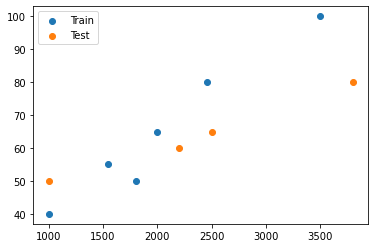

In [3]:
plt.scatter(X_train.sqft, y_train, label='Train')
plt.scatter(X_test.sqft, y_test, label = 'Test')
plt.legend()

### LINEAR REGRESSION

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [6]:
lr_model.coef_

array([0.02492521])

In [7]:
y_pred = lr_model.predict(X_train)

In [8]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  18.540402526677713
RMSE     :  4.305856770339408
R2 Score :  0.9536489936833057


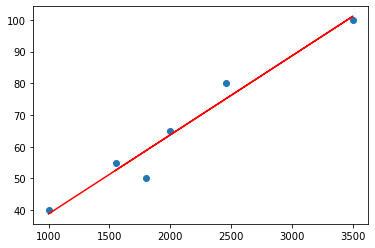

In [9]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred,'r-')

In [10]:
y_pred = lr_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  286.119131689681
RMSE     :  16.915056360818934
R2 Score :  -1.4415499237519445


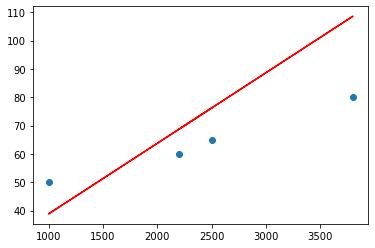

In [12]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred,'r-')

### RIDGE REGRESSION (L2)

In [13]:
from sklearn.linear_model import Ridge

In [14]:
ridge = Ridge(normalize=True, alpha=0.4)
ridge.fit(X_train,y_train)

C:\Users\nagal\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.4, normalize=True)

In [15]:
ridge.coef_

array([0.01780372])

In [16]:
y_pred = ridge.predict(X_train)

In [17]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  49.67996150409173
RMSE     :  7.048401343857465
R2 Score :  0.8758000962397707


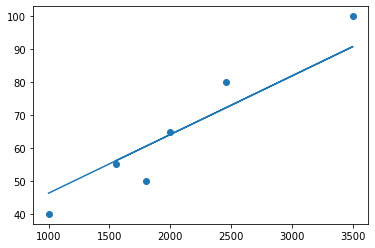

In [18]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [19]:
y_pred = ridge.predict(X_test)

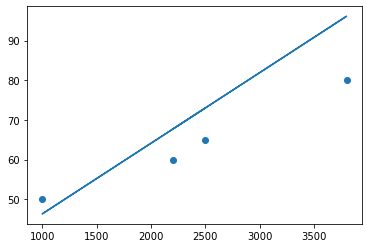

In [20]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [21]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  99.2170215888039
RMSE     :  9.960774146059327
R2 Score :  0.15334808244220666


### LASSOCV

In [23]:
from sklearn.linear_model import LassoCV

In [24]:
lasso = LassoCV(normalize = True, cv = 3, alphas = [.5,1, 2,4,6])
lasso.fit(X_train,y_train)

C:\Users\nagal\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(alphas=[0.5, 1, 2, 4, 6], cv=3, normalize=True)

In [25]:
lasso.coef_

array([0.02336221])

In [26]:
lasso.alpha_

0.5

In [27]:
y_pred = lasso.predict(X_train)

In [28]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  20.040402526677717
RMSE     :  4.476650815808367
R2 Score :  0.9498989936833057


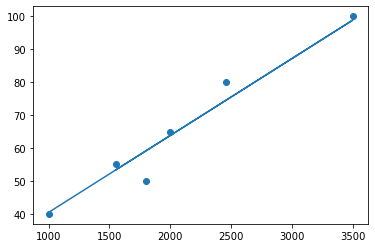

In [29]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [30]:
y_pred = lasso.predict(X_test)

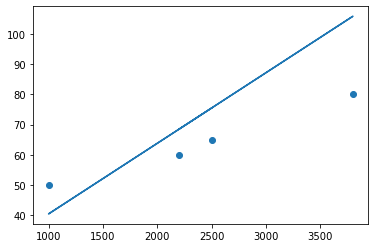

In [31]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [32]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  235.56807070118174
RMSE     :  15.348226956270283
R2 Score :  -1.0101808699834174


In [33]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  235.56807070118174
RMSE     :  15.348226956270283
R2 Score :  -1.0101808699834174
